In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import dataprob
import copy
import linkage


In [2]:
#### Load Experimental Data

## EDTA --> Buffer

cell_vol = 201.3
sd = 0.1

## EDTA --> Buffer

blank1 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240806\4mMEDTAinto0uMCa2.csv",
                                        cell_contents={},
                                        syringe_contents={"ET":4e-3},
                                        cell_volume=cell_vol,
                                        conc_to_float="ET")
blank1.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

blank2 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240806\4mMEDTAinto0uMCa3.csv",
                                        cell_contents={},
                                        syringe_contents={"ET":4e-3},
                                        cell_volume=cell_vol,
                                        conc_to_float="ET")
blank2.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

## Ca --> Buffer

blank3 = linkage.experiment.Experiment(r"S:\Harmslab\ITC2\20241220\1mMCatobuffer.csv",
                                        cell_contents={},
                                        syringe_contents={"CT":1e-3},
                                        cell_volume=cell_vol,
                                        conc_to_float="CT")
blank3.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

blank4 = linkage.experiment.Experiment(r"S:\Harmslab\ITC2\20241220\1mMCatobuffer2.csv",
                                        cell_contents={},
                                        syringe_contents={"CT":1e-3},
                                        cell_volume=cell_vol,
                                        conc_to_float="CT")
blank4.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

## EDTA --> Ca

edtaca1 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20241001\3mMEDTAto500uMCa.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca1.define_itc_observable(obs_column="heat",
                            obs_std=sd)


edtaca2 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240915\3p5mMEDTAto500uMCaCl2lowres.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3.5e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca2.define_itc_observable(obs_column="heat",
                            obs_std=sd)


edtaca3 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240913\3p5mMEDTAto500uMCaLOWRES.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3.5e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca3.define_itc_observable(obs_column="heat",
                            obs_std=sd)

edtaca4 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240912\3mMEDTAto500uMCaCl2.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca4.define_itc_observable(obs_column="heat",
                            obs_std=sd)

edtaca5 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240912\3mMEDTAto500uMCaCl2_2.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca5.define_itc_observable(obs_column="heat",
                            obs_std=sd)

edtaca6 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240912\3mMEDTAto500uMCaCl2_3.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca6.define_itc_observable(obs_column="heat",
                            obs_std=sd)




In [3]:
#### Create model instance
#Full Lists
blank_list = [blank1, blank2, blank3, blank4]
edtaca_list = [edtaca1, edtaca2, edtaca3, edtaca4, edtaca5, edtaca6]


#Combine experiment types into one list
expt_list = blank_list + edtaca_list


# Read the model specification from file
spec_file_path = r"C:\Users\willi\linkage\src\linkage\model_specs\CaEDTA.txt"

# Read spec
with open(spec_file_path, 'r') as f:
    model_spec = f.read()

# Create GlobalModel with spec
gm = linkage.GlobalModel(
    model_name="GenericBindingModel",
    model_spec=model_spec,
    expt_list=expt_list
)

#Setup dataprob
f = dataprob.setup(gm.model_normalized,
                   method="ml",
                   vector_first_arg=True,
                   fit_parameters=gm.parameter_names)



INFO: Analytical Jacobian was successfully generated for the binding model.


In [4]:
f.param_df

,name,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,
KE,KE,0.0,False,-inf,inf,NaN,NaN
dH_E,dH_E,0.0,False,-inf,inf,NaN,NaN
nuisance_dil_CT,nuisance_dil_CT,0.0,False,-inf,inf,NaN,NaN
nuisance_dil_ET,nuisance_dil_ET,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_0_ET_fudge,nuisance_expt_0_ET_fudge,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_1_ET_fudge,nuisance_expt_1_ET_fudge,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_2_CT_fudge,nuisance_expt_2_CT_fudge,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_3_CT_fudge,nuisance_expt_3_CT_fudge,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_4_ET_fudge,nuisance_expt_4_ET_fudge,0.0,False,-inf,inf,NaN,NaN


In [5]:
param_configs = {
    "KE": {
        "guess": 16.18,          # ln(K) from previous knowledge
        "lower_bound": 14.0,     # K ~ 1.2e6 M^-1
        "upper_bound": 18.0,     # K ~ 6.5e7 M^-1
    },
    "dH_E": {
        "guess": -11000,         # dH in cal/mol (~ -11 kcal/mol)
        "lower_bound": -15000,   # -15 kcal/mol
        "upper_bound": -5000,    # -5 kcal/mol
    },
    "nuisance_dil_CT": {
        "guess": 0.0,
        "lower_bound": -5000,
        "upper_bound": 5000,
    },
    "nuisance_dil_ET": {
        "guess": 0.0,
        "lower_bound": -5000,
        "upper_bound": 5000,
    },
}

for param_name, settings in param_configs.items():
    if param_name in f.param_df.index:
        for key, value in settings.items():
            f.param_df.loc[param_name, key] = value

fudge_params = [name for name in f.param_df.index if 'nuisance_expt' in name]
for param_name in fudge_params:
    f.param_df.loc[param_name, 'guess'] = 1.1
    f.param_df.loc[param_name, 'fixed'] = True
    f.param_df.loc[param_name, 'lower_bound'] = 0.8
    f.param_df.loc[param_name, 'upper_bound'] = 1.2

f.param_df

,name,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,
KE,KE,16.18,False,14.0,18.0,NaN,NaN
dH_E,dH_E,-11000.00,False,-15000.0,-5000.0,NaN,NaN
nuisance_dil_CT,nuisance_dil_CT,0.00,False,-5000.0,5000.0,NaN,NaN
nuisance_dil_ET,nuisance_dil_ET,0.00,False,-5000.0,5000.0,NaN,NaN
nuisance_expt_0_ET_fudge,nuisance_expt_0_ET_fudge,1.10,True,0.8,1.2,NaN,NaN
nuisance_expt_1_ET_fudge,nuisance_expt_1_ET_fudge,1.10,True,0.8,1.2,NaN,NaN
nuisance_expt_2_CT_fudge,nuisance_expt_2_CT_fudge,1.10,True,0.8,1.2,NaN,NaN
nuisance_expt_3_CT_fudge,nuisance_expt_3_CT_fudge,1.10,True,0.8,1.2,NaN,NaN
nuisance_expt_4_ET_fudge,nuisance_expt_4_ET_fudge,1.10,True,0.8,1.2,NaN,NaN


In [6]:
### ML FITTER FUNCTION CALL (Requires method="ml" in the dataprob fitter setup)

f.fit(
    y_obs=gm.y_obs_normalized,
    y_std=gm.y_std_normalized,

    # --- Core Arguments for the Optimizer ---
    method='trf',          # Trust Region Reflective is good for bounded problems.

    # --- Tolerances ---
    # Loosen ftol/gtol slightly to handle flat regions, keep xtol tight.
    ftol=1e-12,             # Termination by change in cost function.
    xtol=1e-9,             # Termination by change in parameters.
    gtol=1e-9,             # Termination by norm of the gradient.

    # --- Scaling and Robustness ---
    x_scale='jac',         # Crucial for problems where parameters have very different
                           # magnitudes. Let the Jacobian estimate the scales.
    loss='linear',         # Standard least-squares. Change to 'soft_l1' if you
                           # suspect outliers in your data.

    # --- Number of function evaluations ---
    max_nfev=100,

    # --- Verbosity ---
    verbose=2              # Keep this at 2 to see the step-by-step progress
                           # of the optimization.
)

INFO: Analytical Jacobian found in the model. Using for optimization.
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.3225e+07                                    9.04e+09    
       1              2         2.2847e+07      2.04e+07       3.24e+02       5.96e+09    
       2              4         2.2626e+07      2.21e+05       1.18e+01       1.76e+09    
       3              6         2.2613e+07      1.26e+04       2.97e+00       9.24e+08    
       4              8         2.2609e+07      4.52e+03       7.07e-01       2.27e+08    
       5             10         2.2609e+07      1.97e+02       3.34e-01       1.14e+08    
       6             12         2.2609e+07      6.28e+01       8.35e-02       2.95e+07    
       7             14         2.2609e+07      3.09e+00       2.09e-02       8.43e+06    
       8             16         2.2609e+07      1.93e-01       1.26e-03       4.66e+06    
       9            

In [7]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
f.fit_df

,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
KE,KE,16.281148,2.382758,11.592604,20.969692,16.180000,False,14.000000,18.000000,NaN,NaN
dH_E,dH_E,-10715.921325,767.697642,-12226.516909,-9205.325741,-11000.000000,False,-15000.000000,-5000.000000,NaN,NaN
nuisance_dil_CT,nuisance_dil_CT,-185.388035,47.023238,-277.915473,-92.860597,0.000000,False,-5000.000000,5000.000000,NaN,NaN
nuisance_dil_ET,nuisance_dil_ET,-0.511499,10.975166,-22.107290,21.084292,0.000000,False,-5000.000000,5000.000000,NaN,NaN
nuisance_expt_0_ET_fudge,nuisance_expt_0_ET_fudge,1.100000,NaN,NaN,NaN,1.100000,True,0.800000,1.200000,NaN,NaN
nuisance_expt_1_ET_fudge,nuisance_expt_1_ET_fudge,1.100000,NaN,NaN,NaN,1.100000,True,0.800000,1.200000,NaN,NaN
nuisance_expt_2_CT_fudge,nuisance_expt_2_CT_fudge,1.100000,NaN,NaN,NaN,1.100000,True,0.800000,1.200000,NaN,NaN
nuisance_expt_3_CT_fudge,nuisance_expt_3_CT_fudge,1.100000,NaN,NaN,NaN,1.100000,True,0.800000,1.200000,NaN,NaN
nuisance_expt_4_ET_fudge,nuisance_expt_4_ET_fudge,1.100000,NaN,NaN,NaN,1.100000,True,0.800000,1.200000,NaN,NaN


## f.fit_quality

#### Plot results

Text(0, 0.5, 'heat')

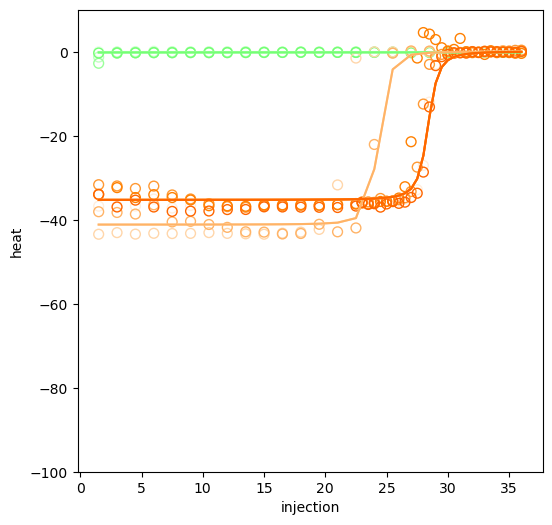

In [8]:
style = {"s":50,
         "facecolor":"none",
         "edgecolor":"black"}
err_style = {"lw":0,
             "elinewidth":1,
             "capsize":2}

orange_list = ['#FFEEDD', '#FFD6AA', '#FFB366', '#FF9933', '#FF8000', '#FF6600', '#FF4400', '#CC3300', '#992200', '#FF0000'] 
purple_list = ['#F2E6FF', '#E0B3FF', '#CC80FF', '#B84DFF', '#A31AFF', '#8800E6', '#6600B3', '#440080', '#2B0052', '#1A0033']
green_list = ['#E8FFE8', '#C1FFC1', '#9AFF9A', '#74FF74', '#4DFF4D', '#26FF26', '#00E600', '#00B300', '#008000', '#004D00']

edtaca_length = len(edtaca_list)
blank_length = len(blank_list)

color_order = green_list[0:blank_length] + orange_list[0:edtaca_length]

fig, ax = plt.subplots(1,figsize=(6,6))

out_df = gm.as_df.copy()
y_calc = gm.model(np.array(f.fit_df["estimate"]))

for i in np.unique(out_df.expt_id):
    
    style["edgecolor"] = color_order[i]
    err_style["color"] = color_order[i]

    mask = out_df["expt_id"] == i
    this_df = out_df.loc[mask,:]

    
    x_values = np.cumsum(this_df["injection"])
    y_values = np.array(this_df["y_obs"])
    y_err = np.array(this_df["y_std"])/np.mean(this_df["injection"])
    this_y_calc = y_calc[mask]/this_df["injection"]

    y_values = y_values/this_df["injection"]
    
    ax.scatter(x_values,y_values,**style)
    ax.errorbar(x=x_values,
                y=y_values,
                #yerr=y_err,
                **err_style)

    ax.plot(x_values,this_y_calc,'-',color=color_order[i])

ax.set_ylim((-100,10))

plt.xlabel("injection")
plt.ylabel("heat")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot settings
style = {"s": 50, "facecolor": "none"}
orange_list = ['#FFEEDD', '#FFD6AA', '#FFB366', '#FF9933', '#FF8000', '#FF6600', '#FF4400', '#CC3300', '#992200', '#FF0000'] 
purple_list = ['#F2E6FF', '#E0B3FF', '#CC80FF', '#B84DFF', '#A31AFF', '#8800E6', '#6600B3', '#440080', '#2B0052', '#1A0033']
green_list = ['#E8FFE8', '#C1FFC1', '#9AFF9A', '#74FF74', '#4DFF4D', '#26FF26', '#00E600', '#00B300', '#008000', '#004D00']

# Get fitted parameters and calculate theoretical heats
params = np.array(f.fit_df["estimate"])
y_calc = gm.model(params)

fig, ax = plt.subplots(1, figsize=(8,6))

# Get overall y range from experimental data to set limits
y_min = gm.as_df["y_obs"].min()
y_max = gm.as_df["y_obs"].max()
y_range = y_max - y_min
y_limits = [y_min - 15*y_range, y_max + 15*y_range]

# Plot each experiment
for i in np.unique(gm.as_df.expt_id):
    style["edgecolor"] = color_order[i]
    
    # Get data for this experiment using gm.as_df
    mask = gm.as_df.expt_id == i
    this_df = gm.as_df.loc[mask,:]
    
    # Get theoretical heats for this experiment
    heats = y_calc[mask]
    # Calculate injection-to-injection differences
    heat_diffs = np.diff(heats, prepend=heats[0])
    
    # Get experimental points
    x_values = np.cumsum(this_df["injection"])
    y_values = this_df["y_obs"]
    
    # Plot experimental points
    ax.scatter(x_values, y_values, 
              **style,
              label=f'Expt {i} (data)')
    
    # Plot theoretical curve using differences
    ax.plot(x_values, heat_diffs, '-',
            color=color_order[i],
            label=f'Expt {i} (fit)')

ax.set_xlabel('Cumulative Injection')
ax.set_ylabel('Heat per injection (μcal)')
ax.set_ylim(y_limits)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
fig = dataprob.plot_corner(f)

In [ ]:
fig = dataprob.plot_summary(f)
